In [42]:
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def init_plot():
    plt.figure(figsize=(9, 9), dpi=80, facecolor='w', edgecolor='k')
    plt.ylim(-1.0, 4.0)
    plt.grid(True, which='both', color='lightblue', linestyle="dotted")
    plt.axhline(y=0, color='lightgrey', linestyle="dashed")
    plt.axvline(x=0, color='lightgrey', linestyle="dashed")
    return plt


# Line Intersection

In [47]:

class Vec:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def determinant(a, b, c, d):
  return a * d - c * b

# Takes vec objects for the start and end of lines from a to b and c to d
def vec_lines_intersection(va, vb, vc, vd):
    denominator = determinant(
            va.x - vb.x, va.y - vb.y,
            vc.x - vd.x, vc.y - vd.y
        )
    determinant_axaybxby = determinant(va.x, va.y, vb.x, vb.y)
    determinant_cxcydxdy = determinant(vc.x, vc.y, vd.x, vd.y)
    x = determinant(
            determinant_axaybxby, va.x - vb.x,
            determinant_cxcydxdy, vc.x - vd.x
        ) / denominator
    y = determinant(
            determinant_axaybxby, va.y - vb.y,
            determinant_cxcydxdy, vc.y - vd.y
        ) / denominator
    return Vec(x, y)

# Takes two lists for start and end of lines a and b where each is a list like [x1, y1, x2, y2]
def list_lines_intersection(a, b):
    return vec_lines_intersection(Vec(a[0], a[1]), Vec(a[2], a[3]), Vec(b[0], b[1]), Vec(b[2], b[3]))



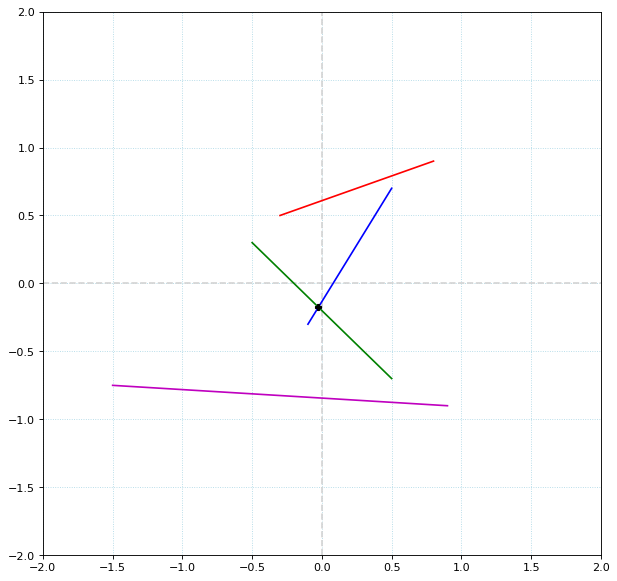

In [48]:
plt = init_plot()
plt.xlim(-2, 2)
plt.ylim(-2, 2)

b_line = [-0.1, -0.3, 0.5, 0.7]
plt.plot(b_line[::2], b_line[1::2], '-b')

g_line = [-0.5, 0.3, 0.5, -0.7]
plt.plot(g_line[::2], g_line[1::2], '-g')

r_line = [-0.3, 0.5, 0.8, 0.9]
plt.plot(r_line[::2], r_line[1::2], '-r')

m_line = [-1.5, -0.75, 0.9, -0.9]
plt.plot(m_line[::2], m_line[1::2], '-m')

v = vec_lines_intersection(Vec(g_line[0], g_line[1]), Vec(g_line[2], g_line[3]), Vec(b_line[0], b_line[1]), Vec(b_line[2], b_line[3]))
plt.plot([v.x], [v.y], 'Pk')


# Parabola: $ y = (x + h)^2 + k $

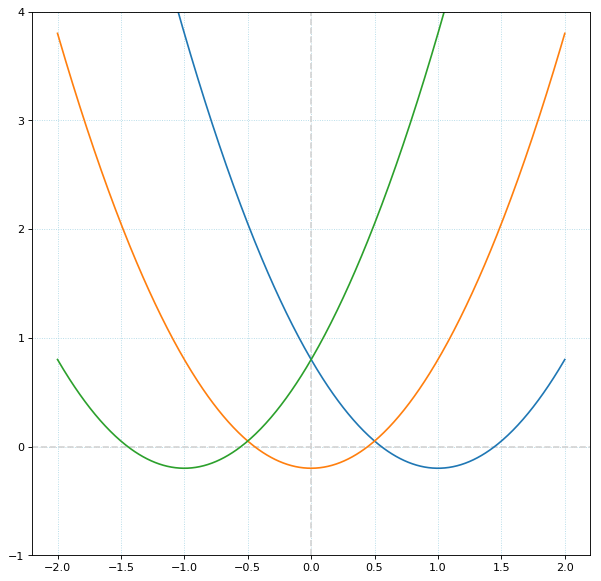

In [45]:
x = np.linspace(-2, 2, 500)
h = np.linspace(-1, 1, 3)
k = -0.2

p = init_plot()
for _h in h:
    p.plot(x, pow(x + _h, 2) + k, '-')

## Trig Functions

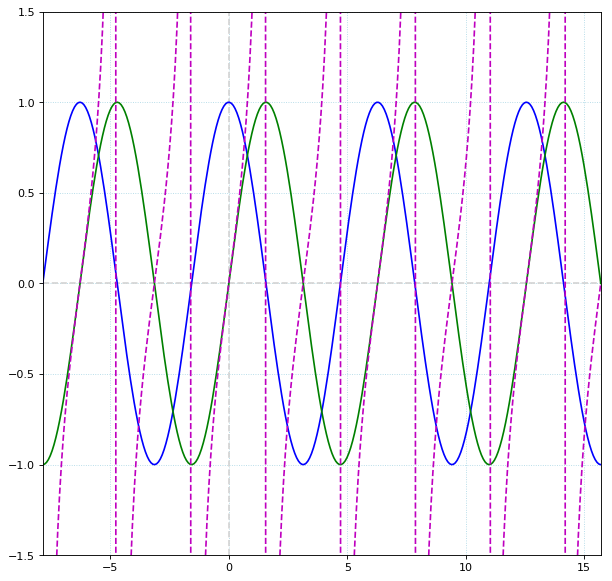

In [46]:
x = np.linspace(-np.pi * 2.5, np.pi * 5, 300)

p = init_plot()
p.xlim(-np.pi * 2.5, np.pi * 5)
p.ylim(-1.5, 1.5)
p.plot(x, np.cos(x), '-b')
p.plot(x, np.sin(x), '-g')
p.plot(x, np.tan(x), '--m')


In [41]:
a = [0.0, 0.0, 1.0, 1.0]
np.linalg.det(a)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional